## Визуализация данных

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

In [2]:
!pip install --user matplotlib==3.6.1

In [5]:
import matplotlib; matplotlib.__version__

'3.6.1'

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [4]:
!pip install pandas_datareader

In [6]:
from pandas_datareader import DataReader
from datetime import datetime

df = DataReader("AAPL", "yahoo", start=datetime(2017, 1, 1), end=datetime(2018, 12, 31))

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219831
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189365
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.327631
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.632294
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.885387
...,...,...,...,...,...,...
2018-12-24,37.887501,36.647499,37.037498,36.707500,148676800.0,35.487965
2018-12-26,39.307499,36.680000,37.075001,39.292500,234330000.0,37.987076
2018-12-27,39.192501,37.517502,38.959999,39.037498,212468400.0,37.740551


In [50]:
df.index.inferred_type == "datetime64"

True

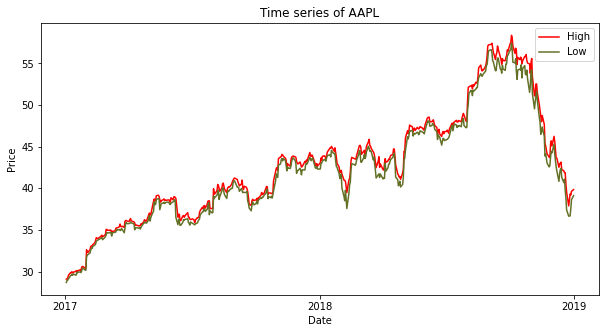

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# ax.plot(df["High"].tolist()) по дням
ax.plot(df["High"], c="red", label="High")
ax.plot(df["Low"], c="#637126", label="Low")
ax.legend()

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Time series of AAPL")

ax.xaxis.set_major_locator(mdates.YearLocator())

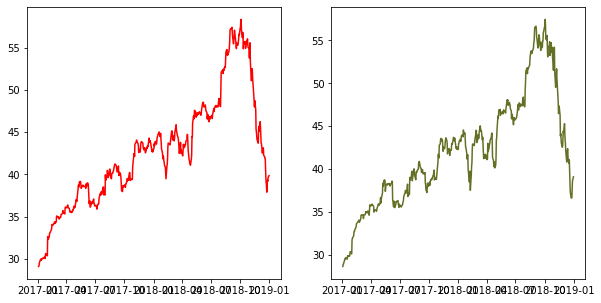

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# ax.plot(df["High"].tolist()) по дням
ax1.plot(df["High"], c="red", label="High")
ax2.plot(df["Low"], c="#637126", label="Low")

Text(0.5, 1.0, 'Time series')

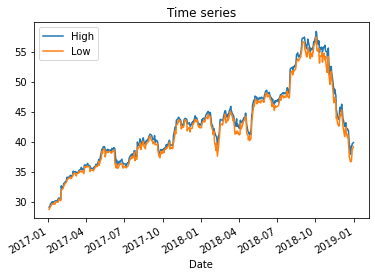

In [7]:
ax = df[["High", "Low"]].plot.line()
ax.set_title("Time series")

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [8]:
df.head(2)
df["year"] = df.index.year.astype(str)
df["quarter"] = df.index.quarter.astype(str)
df.head(2)

,High,Low,Open,Close,Volume,Adj Close,year,quarter
Date,,,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.219833,2017,1
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.189367,2017,1


<bound method Axes.set_title of <AxesSubplot: xlabel='High', ylabel='year'>>

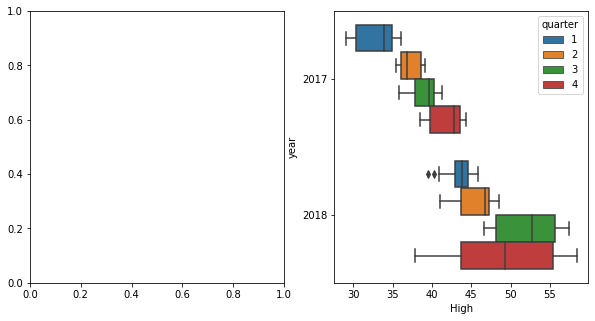

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1 = sns.boxplot(
    data=df,
    x="High",
    y="year",
    hue="quarter"
)

ax1.set_title

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

In [2]:
!pip install pandas_datareader

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas_datareader import DataReader

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 31.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня, по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [4]:
data = np.load('average_ratings.npy')
df_average_ratings = pd.DataFrame(data=data)
df_average_ratings

,0,1,2,3,4,5,6,7,8,9,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
0,5.0,5.013103,5.026240,5.013103,5.000000,4.986932,5.000000,5.013103,5.000000,4.986932,...,5.451021,5.436773,5.451021,5.465305,5.479627,5.493987,5.508384,5.522819,5.537292,5.522819
1,7.0,6.970750,7.000000,6.970750,6.941621,6.970750,7.000000,6.970750,7.000000,7.029373,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,3.0,2.996861,2.993725,2.996861,3.000000,2.996861,2.993725,2.996861,2.993725,2.996861,...,2.984338,2.981216,2.984338,2.981216,2.984338,2.987464,2.990593,2.993725,2.990593,2.987464


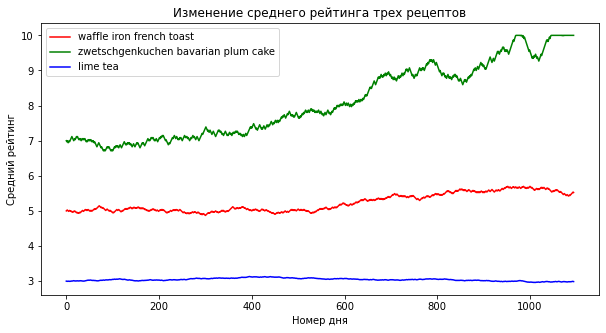

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(df_average_ratings.iloc[0], c="red", label="waffle iron french toast")
ax.plot(df_average_ratings.iloc[1], c="green", label="zwetschgenkuchen bavarian plum cake")
ax.plot(df_average_ratings.iloc[2], c="blue", label="lime tea")
ax.legend()

ax.set_xlabel("Номер дня")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 31.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [6]:
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 30)

res = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date)
).strftime('%d-%m-%Y').tolist()

In [7]:
data = np.load('average_ratings.npy')
df_average_ratings = pd.DataFrame(data=data, columns=res)
df_average_ratings.columns = pd.to_datetime(df_average_ratings.columns, format="%d-%m-%Y")
df_average_ratings

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30
0,5.0,5.013103,5.026240,5.013103,5.000000,4.986932,5.000000,5.013103,5.000000,4.986932,...,5.451021,5.436773,5.451021,5.465305,5.479627,5.493987,5.508384,5.522819,5.537292,5.522819
1,7.0,6.970750,7.000000,6.970750,6.941621,6.970750,7.000000,6.970750,7.000000,7.029373,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,3.0,2.996861,2.993725,2.996861,3.000000,2.996861,2.993725,2.996861,2.993725,2.996861,...,2.984338,2.981216,2.984338,2.981216,2.984338,2.987464,2.990593,2.993725,2.990593,2.987464


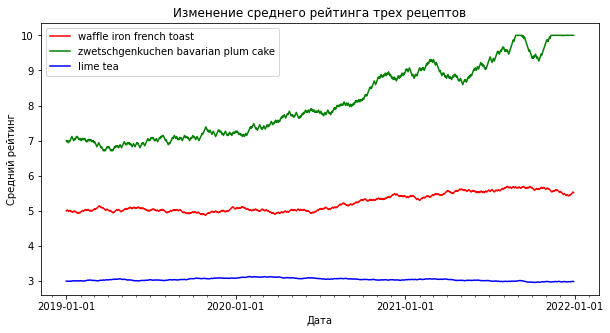

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(df_average_ratings.iloc[0], c="red", label="waffle iron french toast")
ax.plot(df_average_ratings.iloc[1], c="green", label="zwetschgenkuchen bavarian plum cake")
ax.plot(df_average_ratings.iloc[2], c="blue", label="lime tea")
ax.legend()

ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")
ax.set_title("Изменение среднего рейтинга трех рецептов")
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

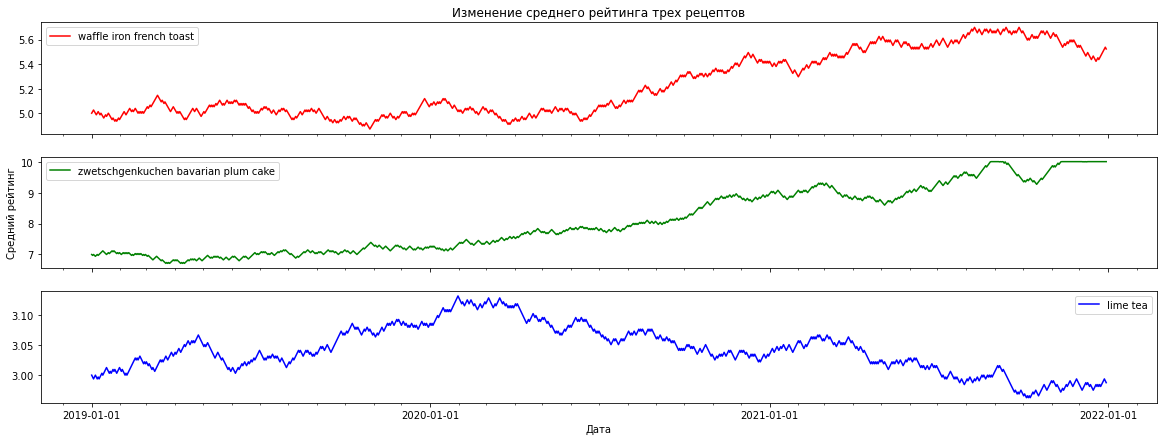

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,7), sharex=True)

ax1.plot(df_average_ratings.iloc[0], c="red", label="waffle iron french toast")
ax2.plot(df_average_ratings.iloc[1], c="green", label="zwetschgenkuchen bavarian plum cake")
ax3.plot(df_average_ratings.iloc[2], c="blue", label="lime tea")
ax1.legend()
ax2.legend()
ax3.legend()

ax3.set_xlabel("Дата")
ax2.set_ylabel("Средний рейтинг")
ax1.set_title("Изменение среднего рейтинга трех рецептов")
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_minor_locator(mdates.MonthLocator())

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [10]:
data_visitors = np.load('visitors.npy')
df_visitors = pd.DataFrame(data=data_visitors)
df_visitors

,0
0,2311
1,2023
2,1839
3,1523
4,1371
...,...
95,2
96,2
97,2
98,2


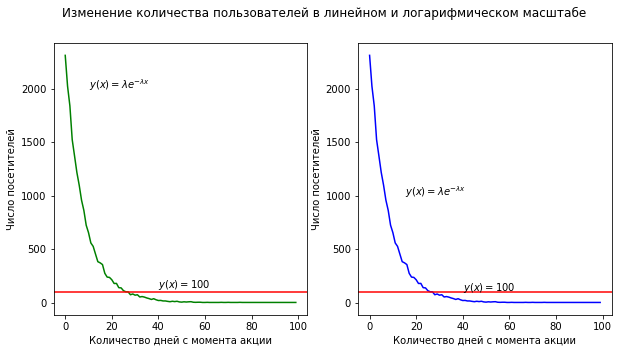

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(df_visitors[0], c='green')
ax2.plot(df_visitors[0], c='blue')

ax1.axhline(y=100, color='r', linestyle='-')
ax2.axhline(y=100, color='r', linestyle='-')

ax1.set_xlabel("Количество дней с момента акции")
ax1.set_ylabel("Число посетителей")
ax2.set_xlabel("Количество дней с момента акции")
ax2.set_ylabel("Число посетителей")
ax1.text(10, 2000, "$y(x)=\lambda e^{-\lambda x}$")
ax2.text(15, 1000, "$y(x)=\lambda e^{-\lambda x}$")
ax1.text(40, 140, "$y(x)=100$")
ax2.text(40, 115, "$y(x)=100$")

plt.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе")
plt.show()

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [12]:
reviews = pd.read_csv("reviews_sample.csv")
recipes = pd.read_csv("recipes_sample.csv")
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [13]:
recipes['classification_of_minutes'] = np.where(recipes.minutes < 5, 'short', 
                                 np.where(recipes.minutes > 50, 'long', 'average'))
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,classification_of_minutes
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,long
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,average
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,average
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,average
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,average
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,long
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,long
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,long
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,long


In [14]:
gr_class_recipe = pd.DataFrame({'count' : recipes.groupby("classification_of_minutes")['id'].count()}).reset_index()
gr_class_recipe

,classification_of_minutes,count
0,average,18903
1,long,10422
2,short,675


In [15]:
mean_class_recipe = pd.DataFrame({'count' : recipes.groupby("classification_of_minutes")['n_steps'].mean()}).reset_index()
mean_class_recipe

,classification_of_minutes,count
0,average,8.745022
1,long,12.035321
2,short,4.990431


In [16]:
merged = gr_class_recipe[["classification_of_minutes","count"]].merge(mean_class_recipe[["classification_of_minutes","count"]], left_on='classification_of_minutes', right_on='classification_of_minutes')
merged = merged.set_index('classification_of_minutes')
merged

,count_x,count_y
classification_of_minutes,,
average,18903,8.745022
long,10422,12.035321
short,675,4.990431


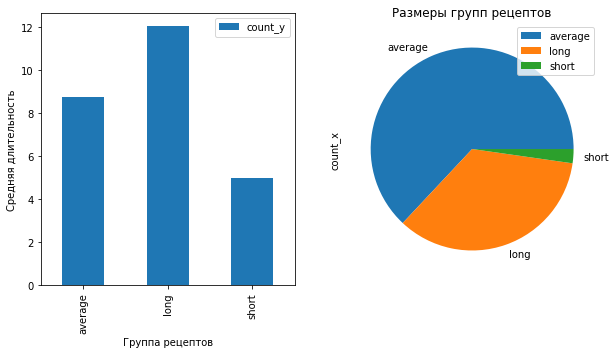

In [17]:
fig, (ax, ax_pie) = plt.subplots(1, 2, figsize=(10, 5))

ax = merged.plot(y="count_y" , kind="bar", ax=ax)
ax.set_xlabel("Группа рецептов")
ax.set_ylabel("Средняя длительность")

ax_pie = merged.plot(y="count_x", kind="pie", ax=ax_pie)
ax_pie.set_title("Размеры групп рецептов")

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [18]:
reviews["date"] = pd.to_datetime(reviews['date'], format="%Y-%m-%d")
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [19]:
reviews_08_09 = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]
reviews_08_09

,Unnamed: 0,user_id,recipe_id,date,rating,review
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
9,1023302,308434,11252,2008-12-14,5,Oh Bergy! These wonderful little cakes are aw...
10,264646,151754,285773,2008-09-04,0,"This was a very moist cornbread, even two days..."
13,126930,379985,150499,2008-08-21,5,I really liked this recipe. It's perfect to ma...
...,...,...,...,...,...,...
126682,532061,335737,36548,2008-04-22,5,If only there were more stars to give! Normall...
126684,698638,1186693,394518,2009-12-09,0,I must have done something wrong! Mine were v...
126690,344676,724631,314698,2008-10-14,5,"5 Stars, The Hunter said the mushrooms and sau..."
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...


In [21]:
for_plot = pd.DataFrame({'count' : reviews_08_09.groupby([reviews_08_09['date'].dt.year, 'rating'])["recipe_id"].count()}).reset_index()
for_plot

,date,rating,count
0,2008,0,693
1,2008,1,136
2,2008,2,236
3,2008,3,718
4,2008,4,3440
5,2008,5,13391
6,2009,0,656
7,2009,1,148
8,2009,2,199
9,2009,3,594


In [22]:
plt_08 = for_plot[for_plot["date"] == 2008]
plt_09 = for_plot[for_plot["date"] == 2009]
print("plt_08", "\n", plt_08, "\n")
print("plt_09", "\n", plt_09)

plt_08 
    date  rating  count
0  2008       0    693
1  2008       1    136
2  2008       2    236
3  2008       3    718
4  2008       4   3440
5  2008       5  13391 

plt_09 
     date  rating  count
6   2009       0    656
7   2009       1    148
8   2009       2    199
9   2009       3    594
10  2009       4   2742
11  2009       5  13333


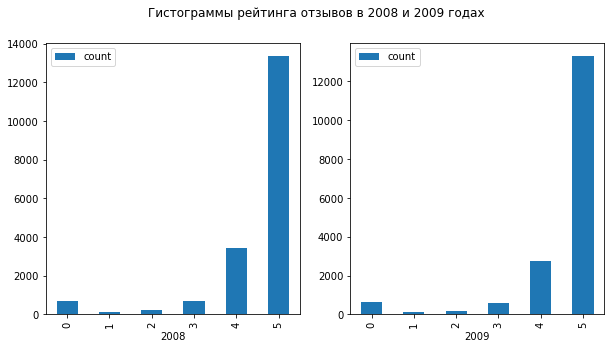

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax1 = plt_08.plot(y="count" , x="rating", kind="bar", ax=ax[0])
ax2 = plt_09.plot(y="count" , x="rating", kind="bar", ax=ax[1])
ax1.set_xlabel("2008")
ax2.set_xlabel("2009")

plt.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

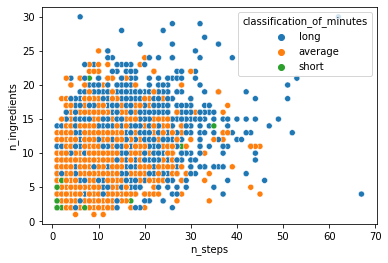

In [24]:
scatt = sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue="classification_of_minutes")

##### Линейность отсутствует

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [25]:
merged = reviews[["recipe_id", "rating"]].merge(recipes[["id","minutes", "n_steps", "n_ingredients"]],left_on='recipe_id', right_on='id')
merged = merged.drop(labels = ["id", "recipe_id"], axis = 1)
merged

,rating,minutes,n_steps,n_ingredients
0,5,50,NaN,NaN
1,5,50,NaN,NaN
2,5,50,NaN,NaN
3,5,50,NaN,NaN
4,5,50,NaN,NaN
...,...,...,...,...
126691,5,105,28.0,15.0
126692,2,480,9.0,NaN
126693,5,130,5.0,7.0
126694,5,70,NaN,NaN


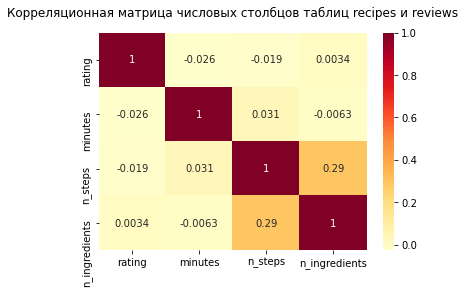

In [26]:
heat_map = sns.heatmap(merged.corr(), cmap="YlOrRd", annot = True)
plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews", pad=16)
plt.show()